有时候使用mne的metadata属性来存储相关数据特别有用，metadata使用pandas.DataFrame来封装数据。
其中每一行对应一个epoch，每一列对应一个epoch的元数据属性。
列必须包含字符串、整数或浮点数。

    
在该数据集中，受试者在屏幕上看到单个单词，并记录每个单词对应的脑电图活动。
我们知道每个epoch显示哪个单词，以及关于这个单词的额外信息(例如，单词频率)。


In [8]:
#导入工具
import mne
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#加载数据

path = mne.datasets.kiloword.data_path() + '/kword_metadata-epo.fif'

In [13]:
epochs = mne.read_epochs(path)

# 从打印的信息可以知道该数据集中有960个样本数据。

Reading C:\Users\Administrator\mne_data\MNE-kiloword-data/kword_metadata-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     920.00 ms
        0 CTF compensation matrices available
960 matching events found
No baseline correction applied
Adding metadata with 8 columns
0 projection items activated


In [14]:
epochs.metadata[:10]

# 元数据以panda.DataFrame的形式存储数据
# 获取前10条记录

,WORD,Concreteness,WordFrequency,OrthographicDistance,NumberOfLetters,BigramFrequency,ConsonantVowelProportion,VisualComplexity
0,film,5.45,3.189490,1.75,4.0,343.25,0.75,55.783710
1,cent,5.90,3.700704,1.35,4.0,546.75,0.75,63.141553
2,shot,4.60,2.858537,1.20,4.0,484.75,0.75,64.600033
3,cold,3.70,3.454540,1.15,4.0,1095.25,0.75,63.657457
4,main,3.00,3.539076,1.35,4.0,686.00,0.50,68.945661
5,poet,4.95,2.485721,1.60,4.0,309.25,0.50,70.572593
6,case,4.95,3.836767,1.00,4.0,690.25,0.50,71.983982
7,land,5.40,3.648945,1.20,4.0,757.50,0.75,65.601033
8,idea,1.95,3.688420,1.90,4.0,201.75,0.25,70.667496
9,love,1.80,3.607026,1.15,4.0,337.25,0.50,61.394212


In [15]:
print(epochs.metadata.head(10))

   WORD  Concreteness  WordFrequency  OrthographicDistance  NumberOfLetters  \
0  film          5.45       3.189490                  1.75              4.0   
1  cent          5.90       3.700704                  1.35              4.0   
2  shot          4.60       2.858537                  1.20              4.0   
3  cold          3.70       3.454540                  1.15              4.0   
4  main          3.00       3.539076                  1.35              4.0   
5  poet          4.95       2.485721                  1.60              4.0   
6  case          4.95       3.836767                  1.00              4.0   
7  land          5.40       3.648945                  1.20              4.0   
8  idea          1.95       3.688420                  1.90              4.0   
9  love          1.80       3.607026                  1.15              4.0   

   BigramFrequency  ConsonantVowelProportion  VisualComplexity  
0           343.25                      0.75         55.783710  


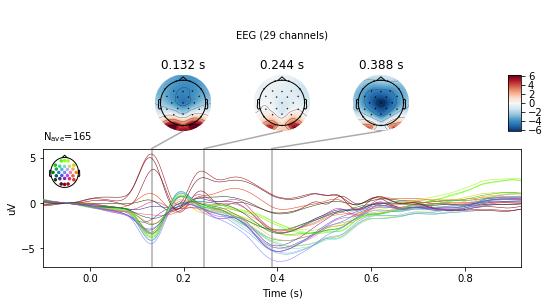

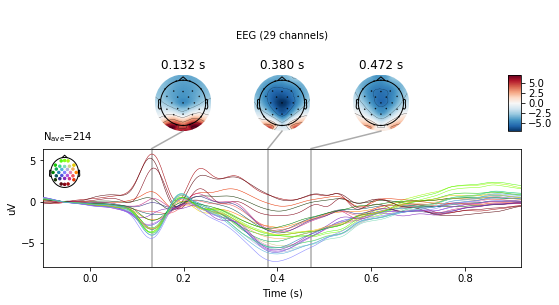

In [16]:
# 我们可以使用该元数据属性来选择epoch的子集。
# 这使用了Pandas中的pandas.DataFrame.query()方法。
# 任何有效的查询字符串都将起作用。

# 下面，我们将绘制两个图进行比较：

av1 = epochs['Concreteness < 5 and WordFrequency < 2'].average()

av2 = epochs['Concreteness > 5 and WordFrequency > 2'].average()

joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))

av1.plot_joint(show=False, **joint_kwargs)
av2.plot_joint(show=False, **joint_kwargs)
plt.show()


5 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


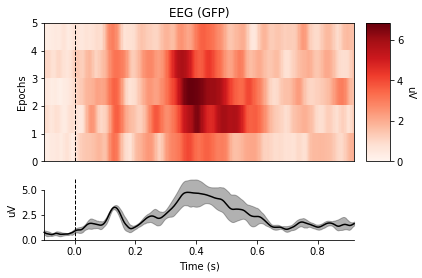

In [24]:
words = ['film', 'cent', 'shot', 'cold', 'main']
epochs['WORD in {}'.format(words)].plot_image(show=False)

plt.show()

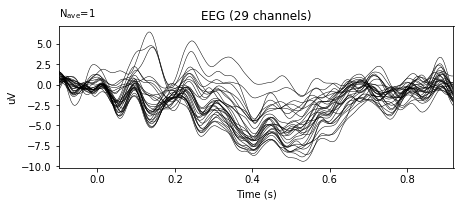

In [25]:
"""
注意，传统的epoch子选择仍然有效。
传统的选择epoch的MNE方法将取代丰富的元数据查询。
"""

epochs['cent'].average().plot(show=False, time_unit='s')
plt.show()

In [29]:
# 下面将展示一个更复杂的示例，该示例利用每个epoch的元数据。
# 我们将在元数据对象中创建一个新列，并使用它生成许多试验子集的平均值。


metadata = epochs.metadatais_concrete = metadata["Concreteness"] > metadata["Concreteness"].median()

#【报错】name 'metadata' is not defined
#     epochs.metadatais_concrete 是什么？
metadata["is_concrete"] = np.where(is_concrete, 'Concrete', 'Abstract')
is_long = metadata["NumberOfLetters"] > 5
metadata["is_long"] = np.where(is_long, 'Long', 'Short')
epochs.metadata = metadata


NameError: name 'metadata' is not defined

In [4]:
"""现在我们可以快速提取(并绘制)数据的子集。例如，看按单词长度和具体程度划分的单词:"""

query = "is_long == '{0}' & is_concrete == '{1}'"
evokeds = dict()
for concreteness in ("Concrete", "Abstract"):
    for length in ("Long", "Short"):
        subset = epochs[query.format(length, concreteness)]
        evokeds["/".join((concreteness, length))] = list(subset.iter_evoked())
# 为了进行实际的可视化，下面存储了许多共享参数。
style_plot = dict(
    colors={"Long": "Crimson", 
            "Short": "Cornflowerblue"},
    linestyles={"Concrete": "-",
                "Abstract": ":"},
    split_legend=True,
    ci=.68,
    show_sensors='lower right',
    legend='lower left',
    truncate_yaxis="auto",
    picks=epochs.ch_names.index("Pz"),)
fig, ax = plt.subplots(figsize=(6, 4))

#绘制诱发响应
mne.viz.plot_compare_evokeds(evokeds, axes=ax, **style_plot)
plt.show()


NameError: name 'epochs' is not defined

In [ ]:
# 下面比较不同字母长度(字母个数)单词所得到的诱发响应。比较长度为4、5、6、7或8个字母的单词：
# 	• 

letters = epochs.metadata["NumberOfLetters"].unique().astype(int).astype(str)
evokeds = dict()
for n_letters in letters:
    evokeds[n_letters] = epochs["NumberOfLetters == " + n_letters].average()
style_plot["colors"] = {n_letters: int(n_letters)
                        for n_letters in letters}
style_plot["cmap"] = ("# of Letters", 
                      "viridis_r")
del style_plot['linestyles']
fig, ax = plt.subplots(figsize=(6, 4))
mne.viz.plot_compare_evokeds(evokeds, axes=ax, **style_plot)
plt.show()


In [ ]:
# 最后，对于字母的具体性与连续长度之间的相互作用:


evokeds = dict()
query = "is_concrete == '{0}' & NumberOfLetters == {1}"
for concreteness in ("Concrete", "Abstract"):
    for n_letters in letters:
        subset = epochs[query.format(concreteness, n_letters)]
        evokeds["/".join((concreteness, n_letters))] = subset.average()
        style_plot["linestyles"] = {"Concrete": "-", "Abstract": ":"}
        fig, ax = plt.subplots(figsize=(6, 4))
mne.viz.plot_compare_evokeds(evokeds, axes=ax, **style_plot)
plt.show()